To illustrate the fundamental functions of the library, we will simply take a `.jpg` file and transform it to a `.txt` file.

Let's first view the page we want to OCR:

In [1]:
import cv2

img_file = 'test_data/single_column_rotated_with_signature.jpg'

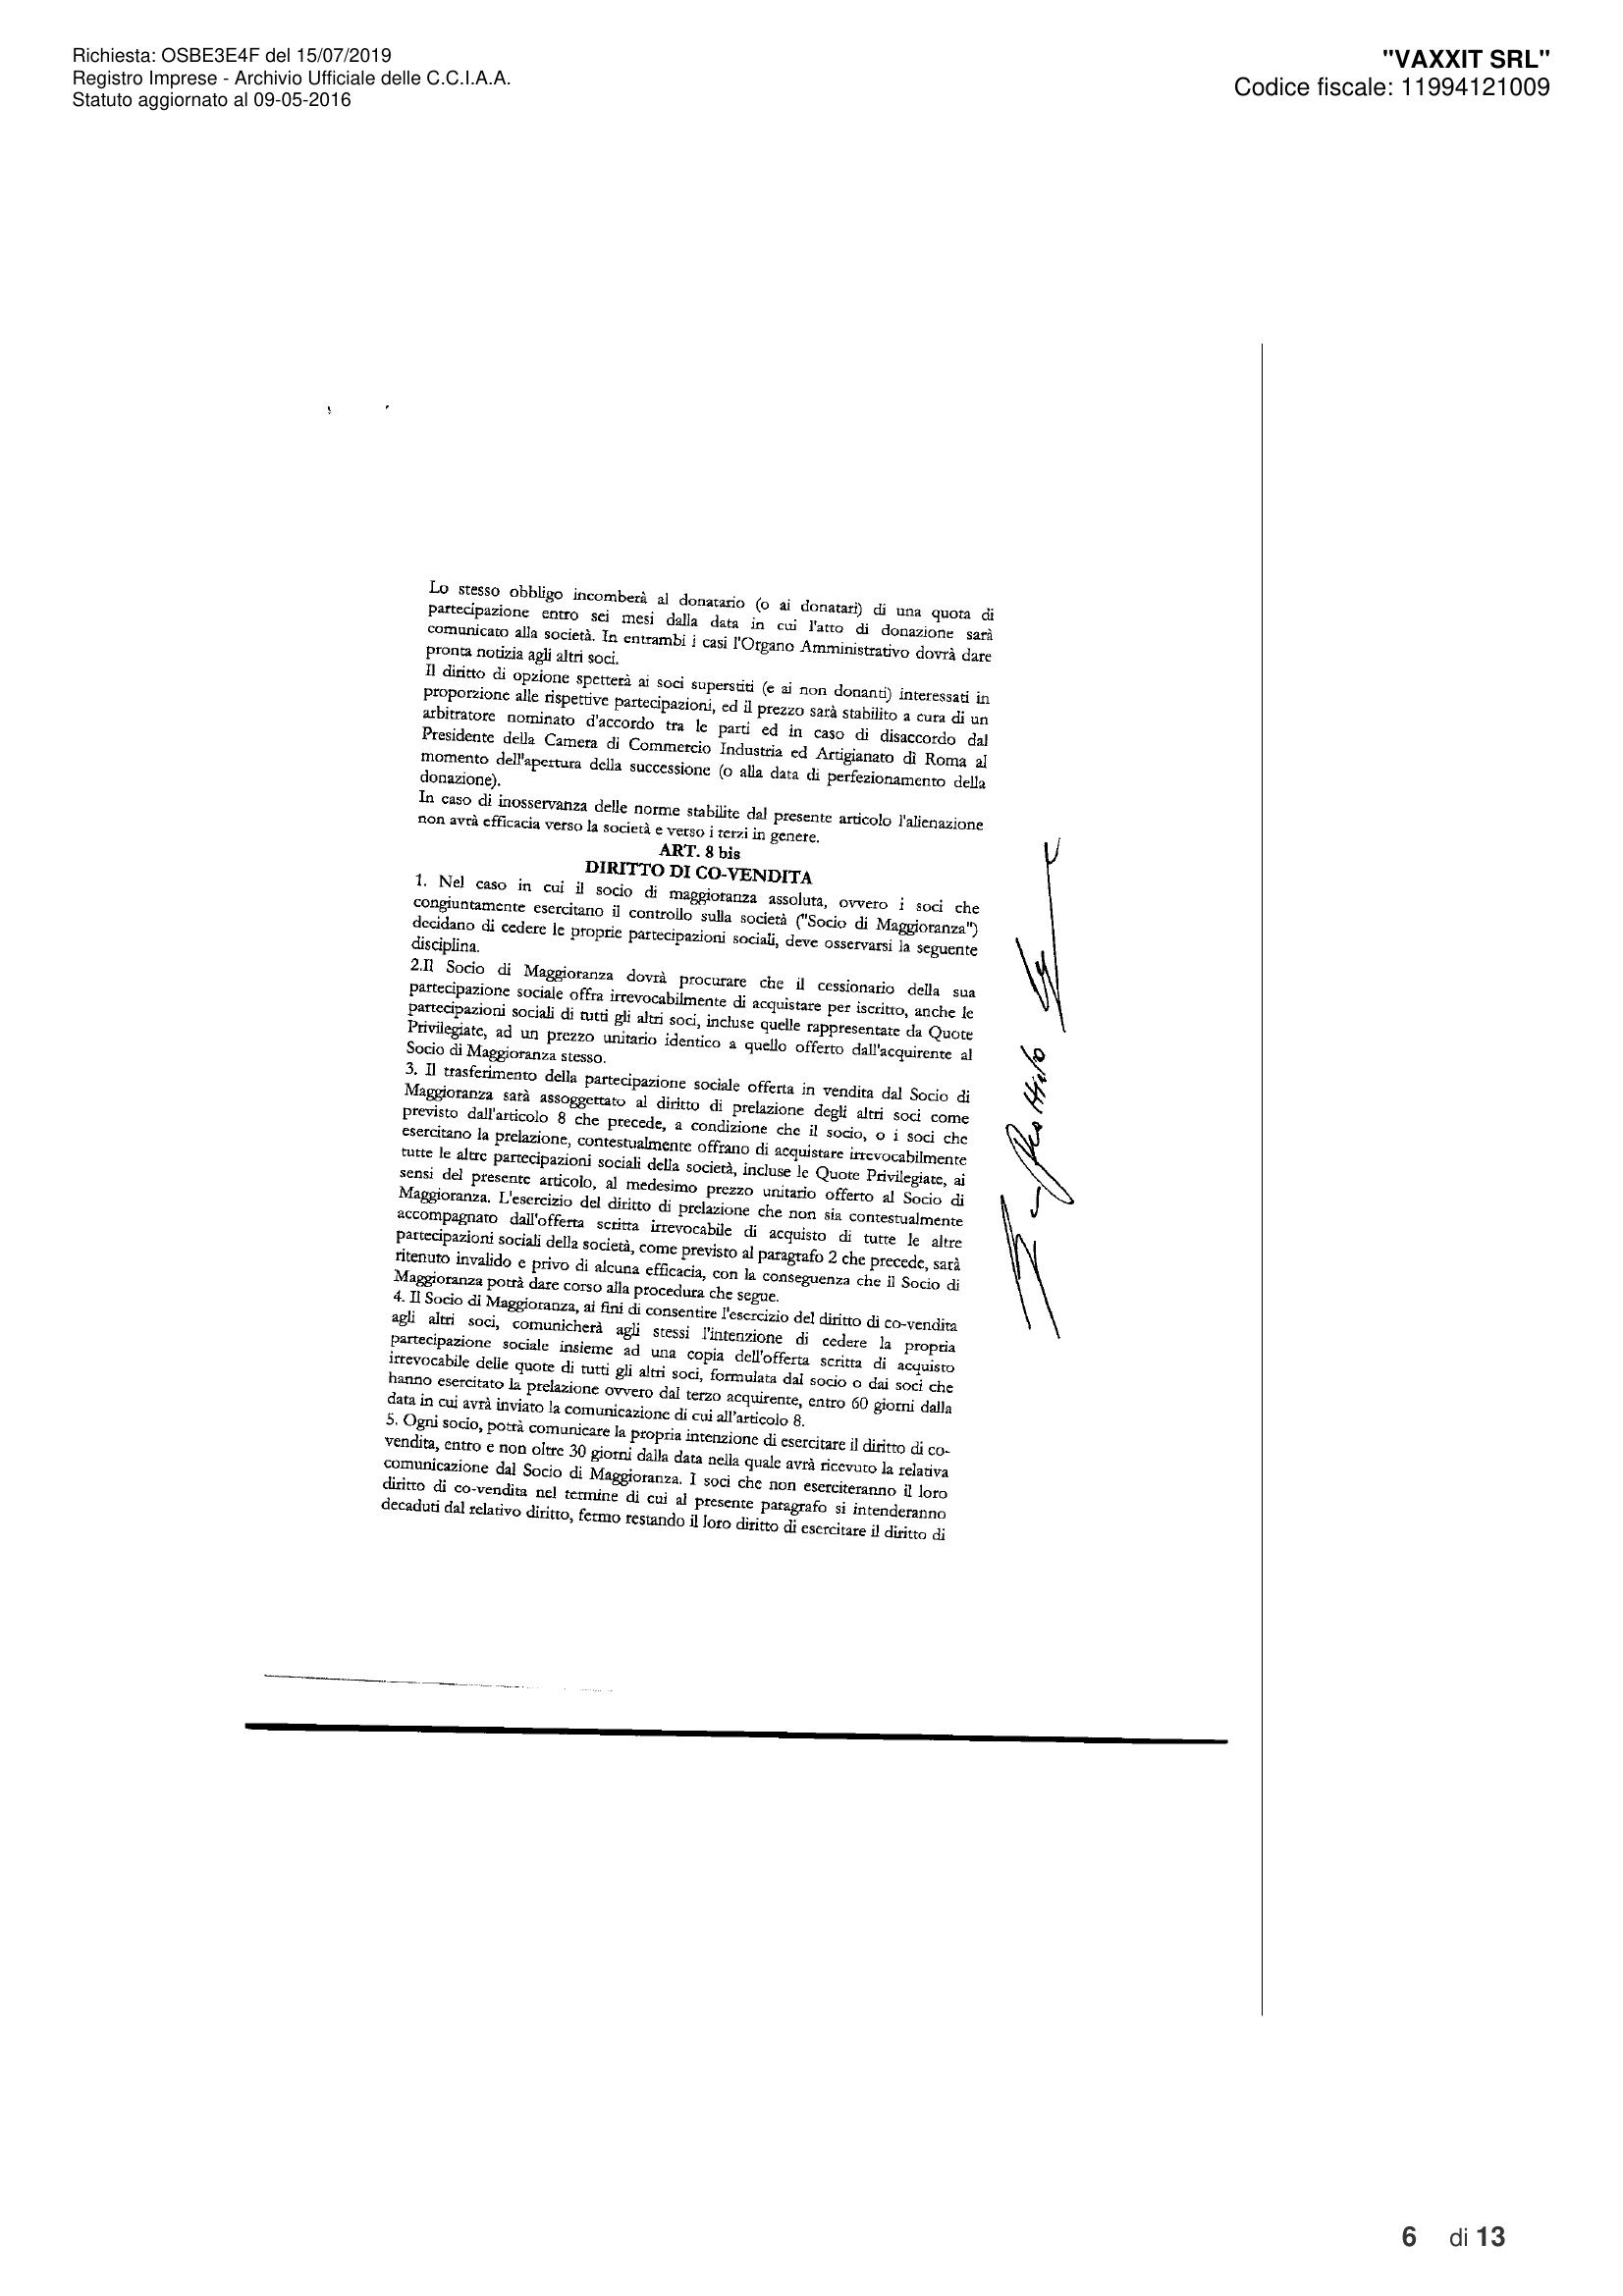

In [2]:
from ocr_legal.utils.functions import show_cv2_img

img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
show_cv2_img(img)

We want to get rid of some of the noise in the image, so we first threshold it (that is set its pixels' intensity to $0$ and $255$) and then clean it of the horizontal and vertical lines in it.

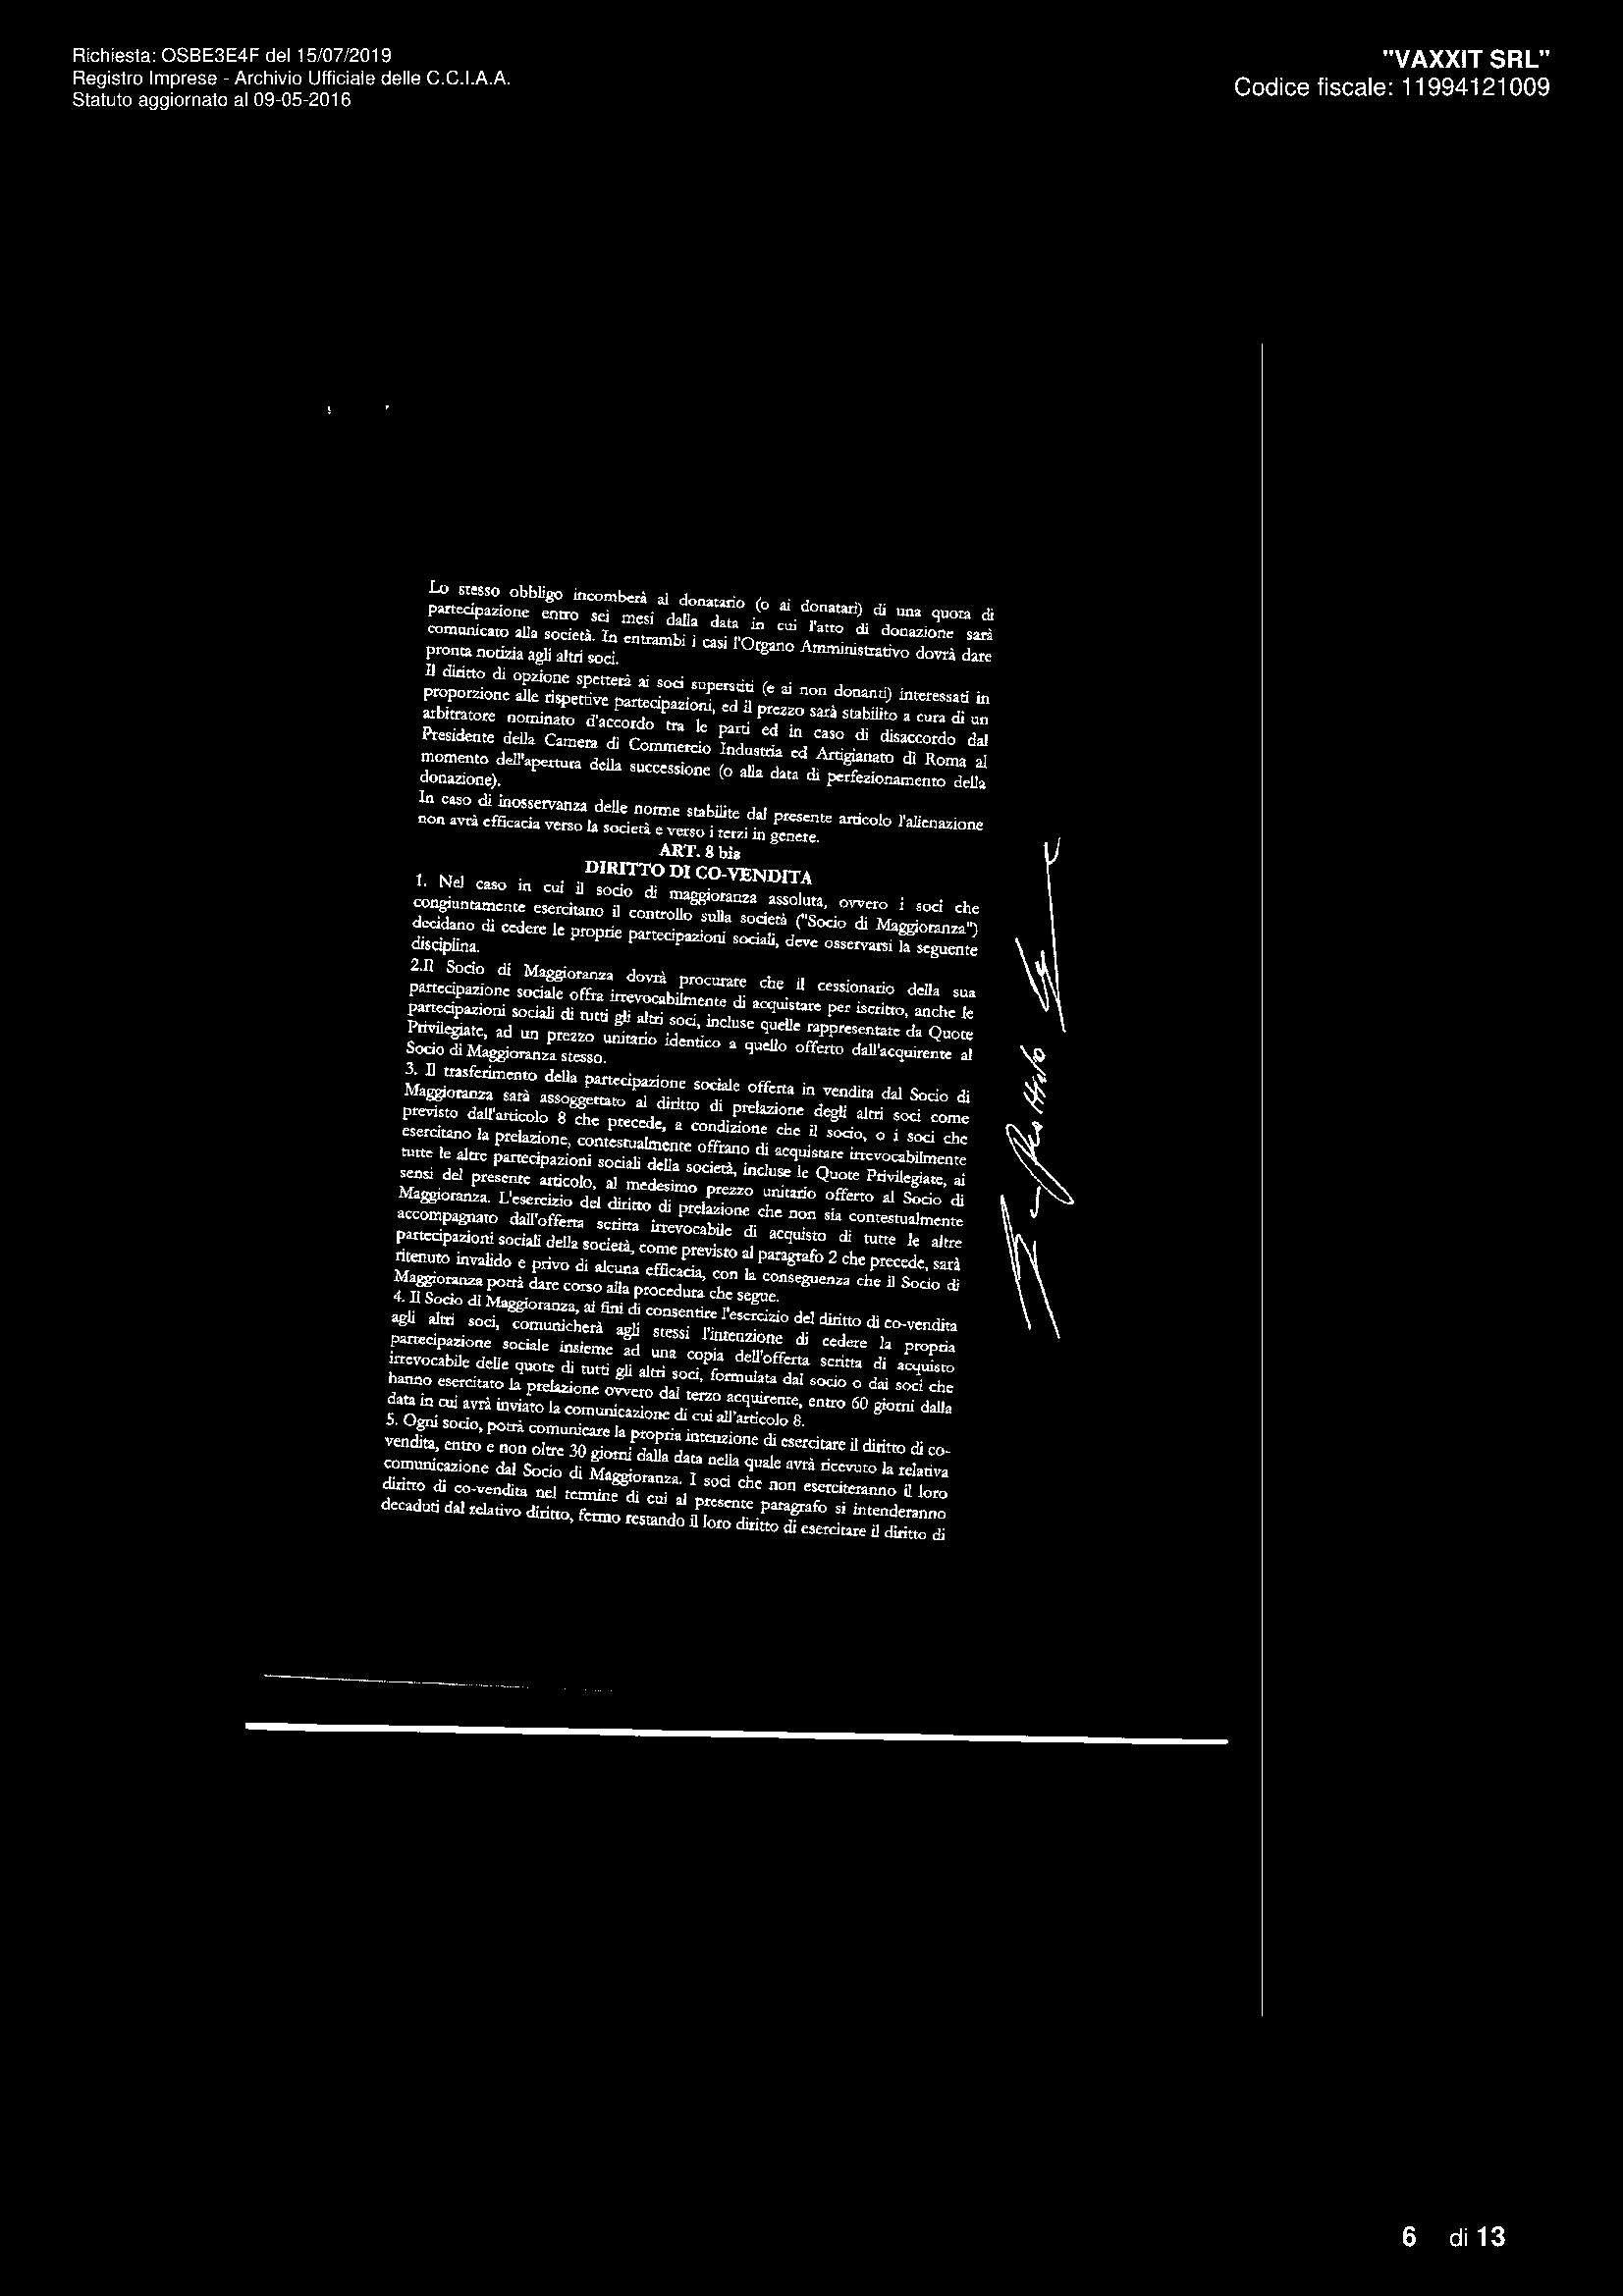

In [3]:
from ocr_legal.jpg_to_txt.jpg_to_roi import threshold

img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
thresh_img = threshold(img)
show_cv2_img(thresh_img)

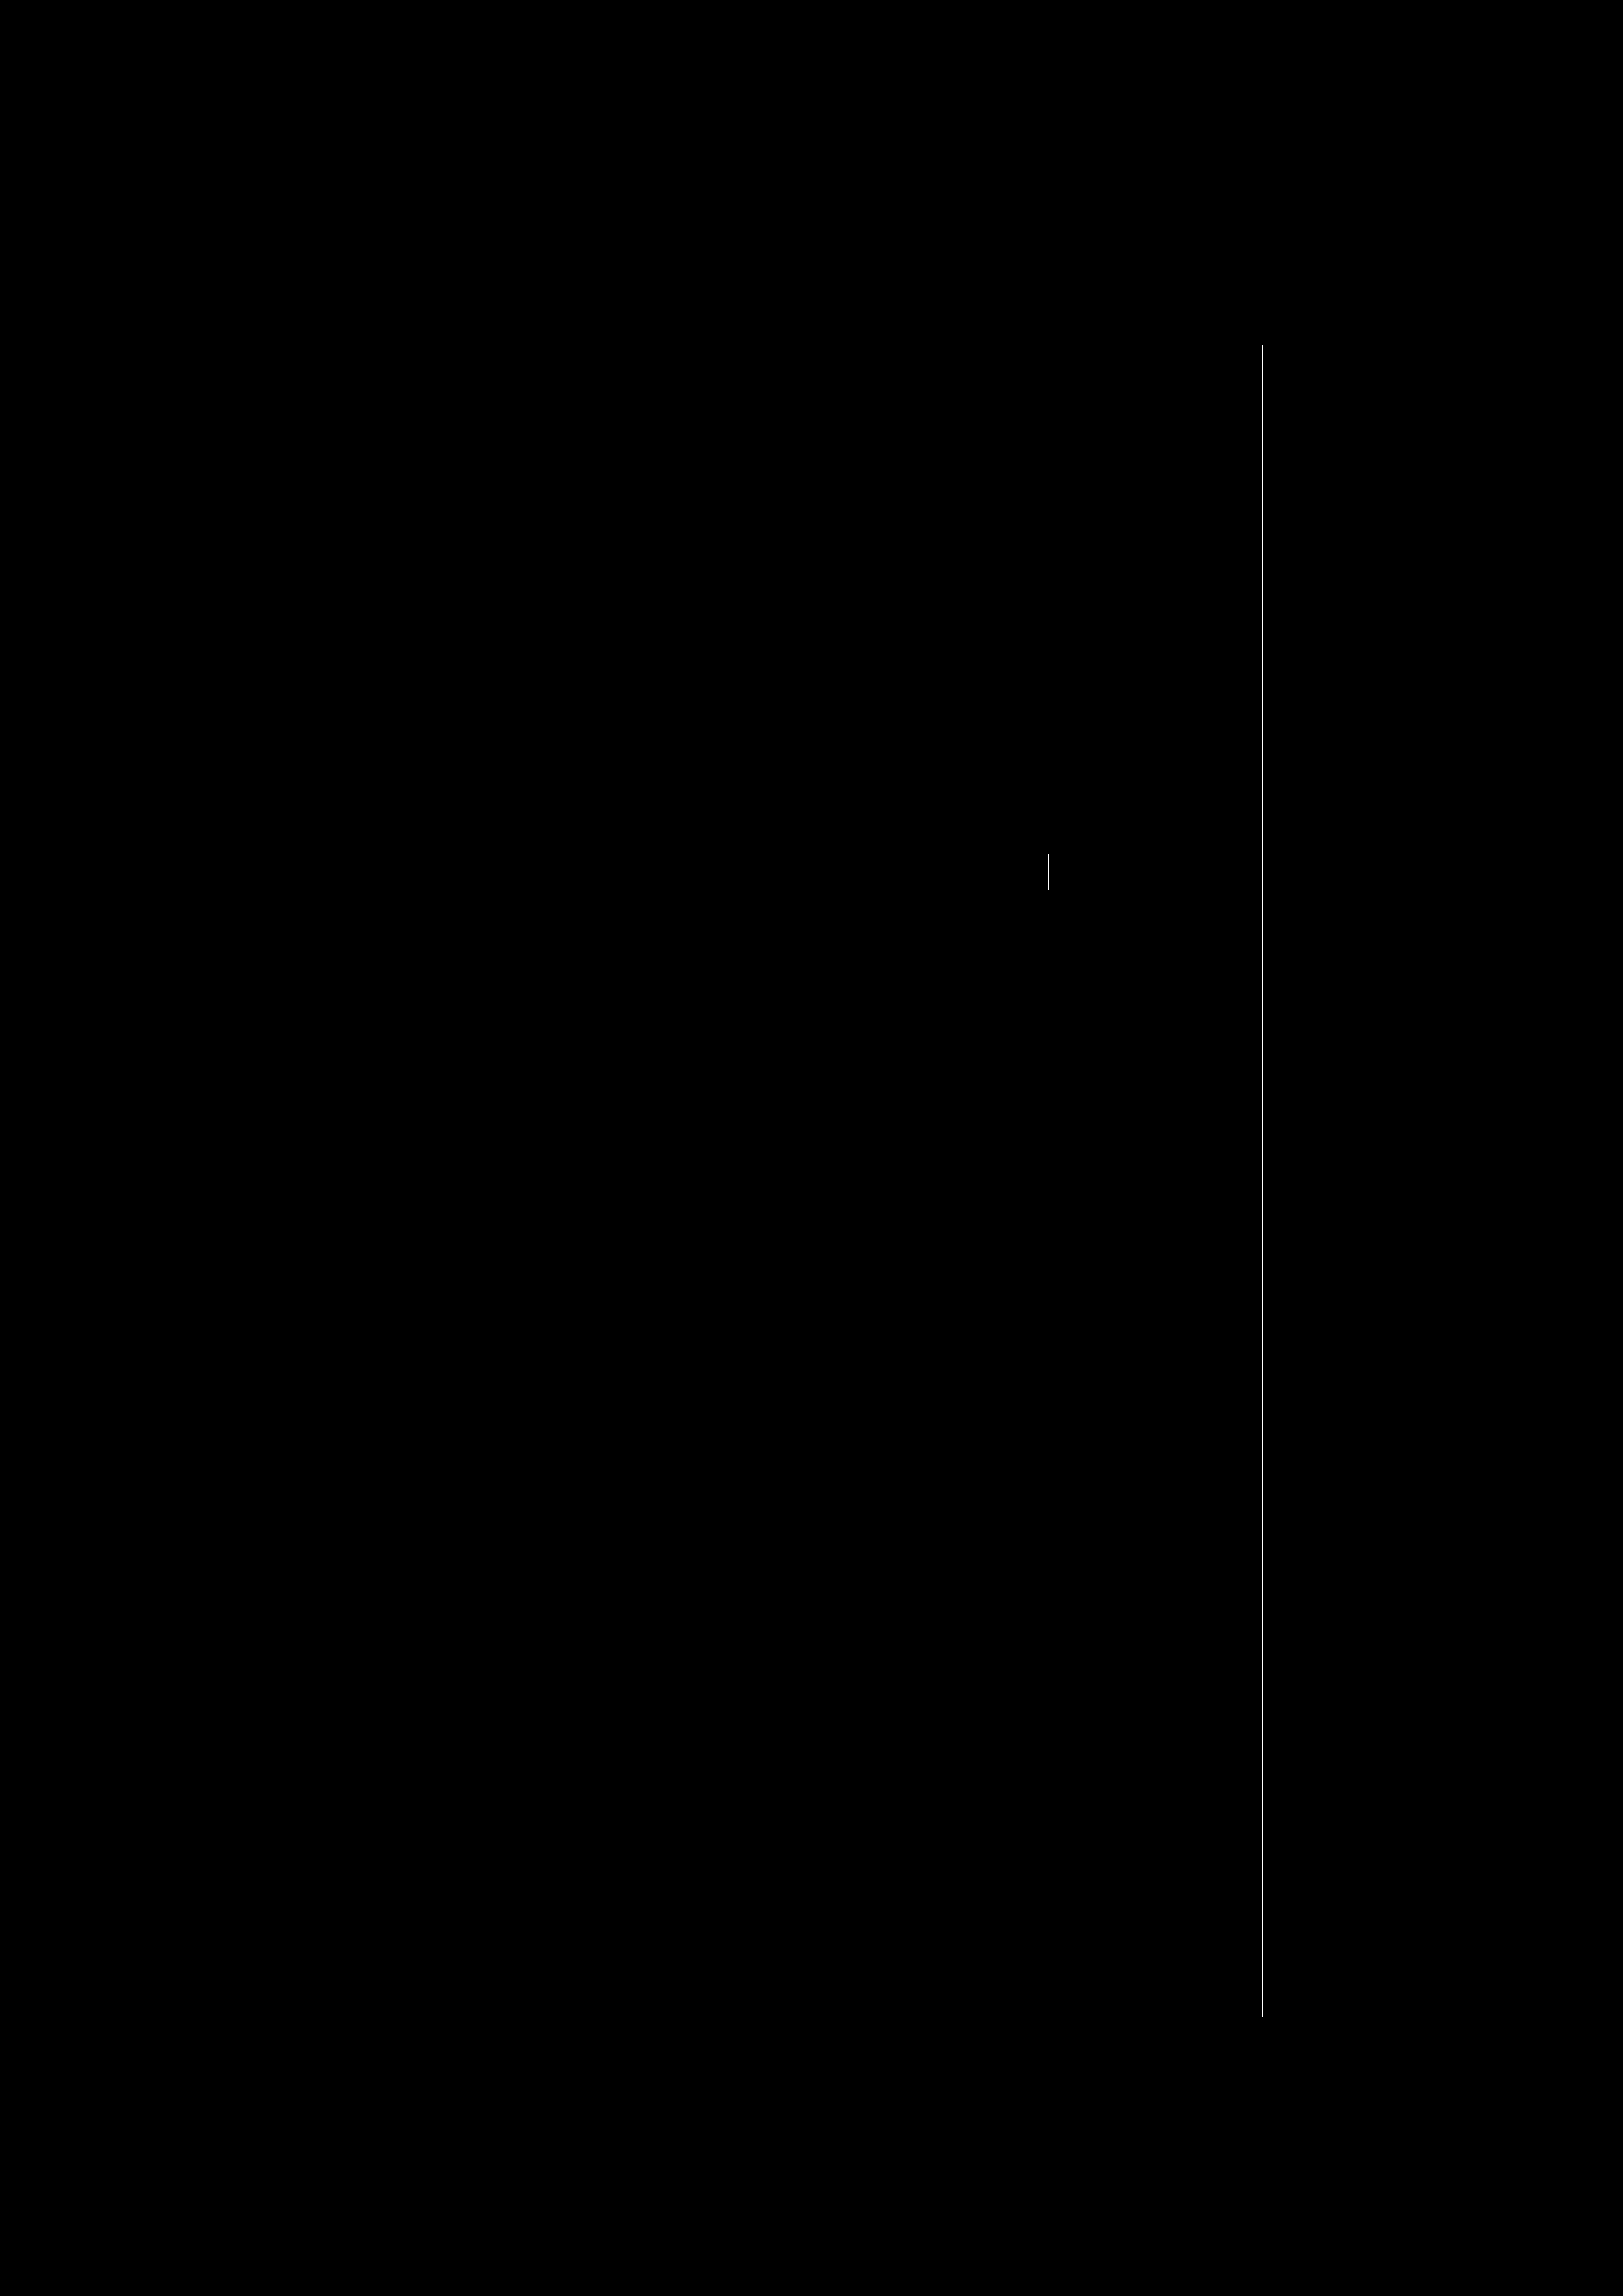

In [4]:
from ocr_legal.jpg_to_txt.jpg_cleaning import detect_vertical_lines, detect_horizontal_lines

v_mask, h_mask = detect_vertical_lines(thresh_img), detect_horizontal_lines(thresh_img)
show_cv2_img(v_mask)

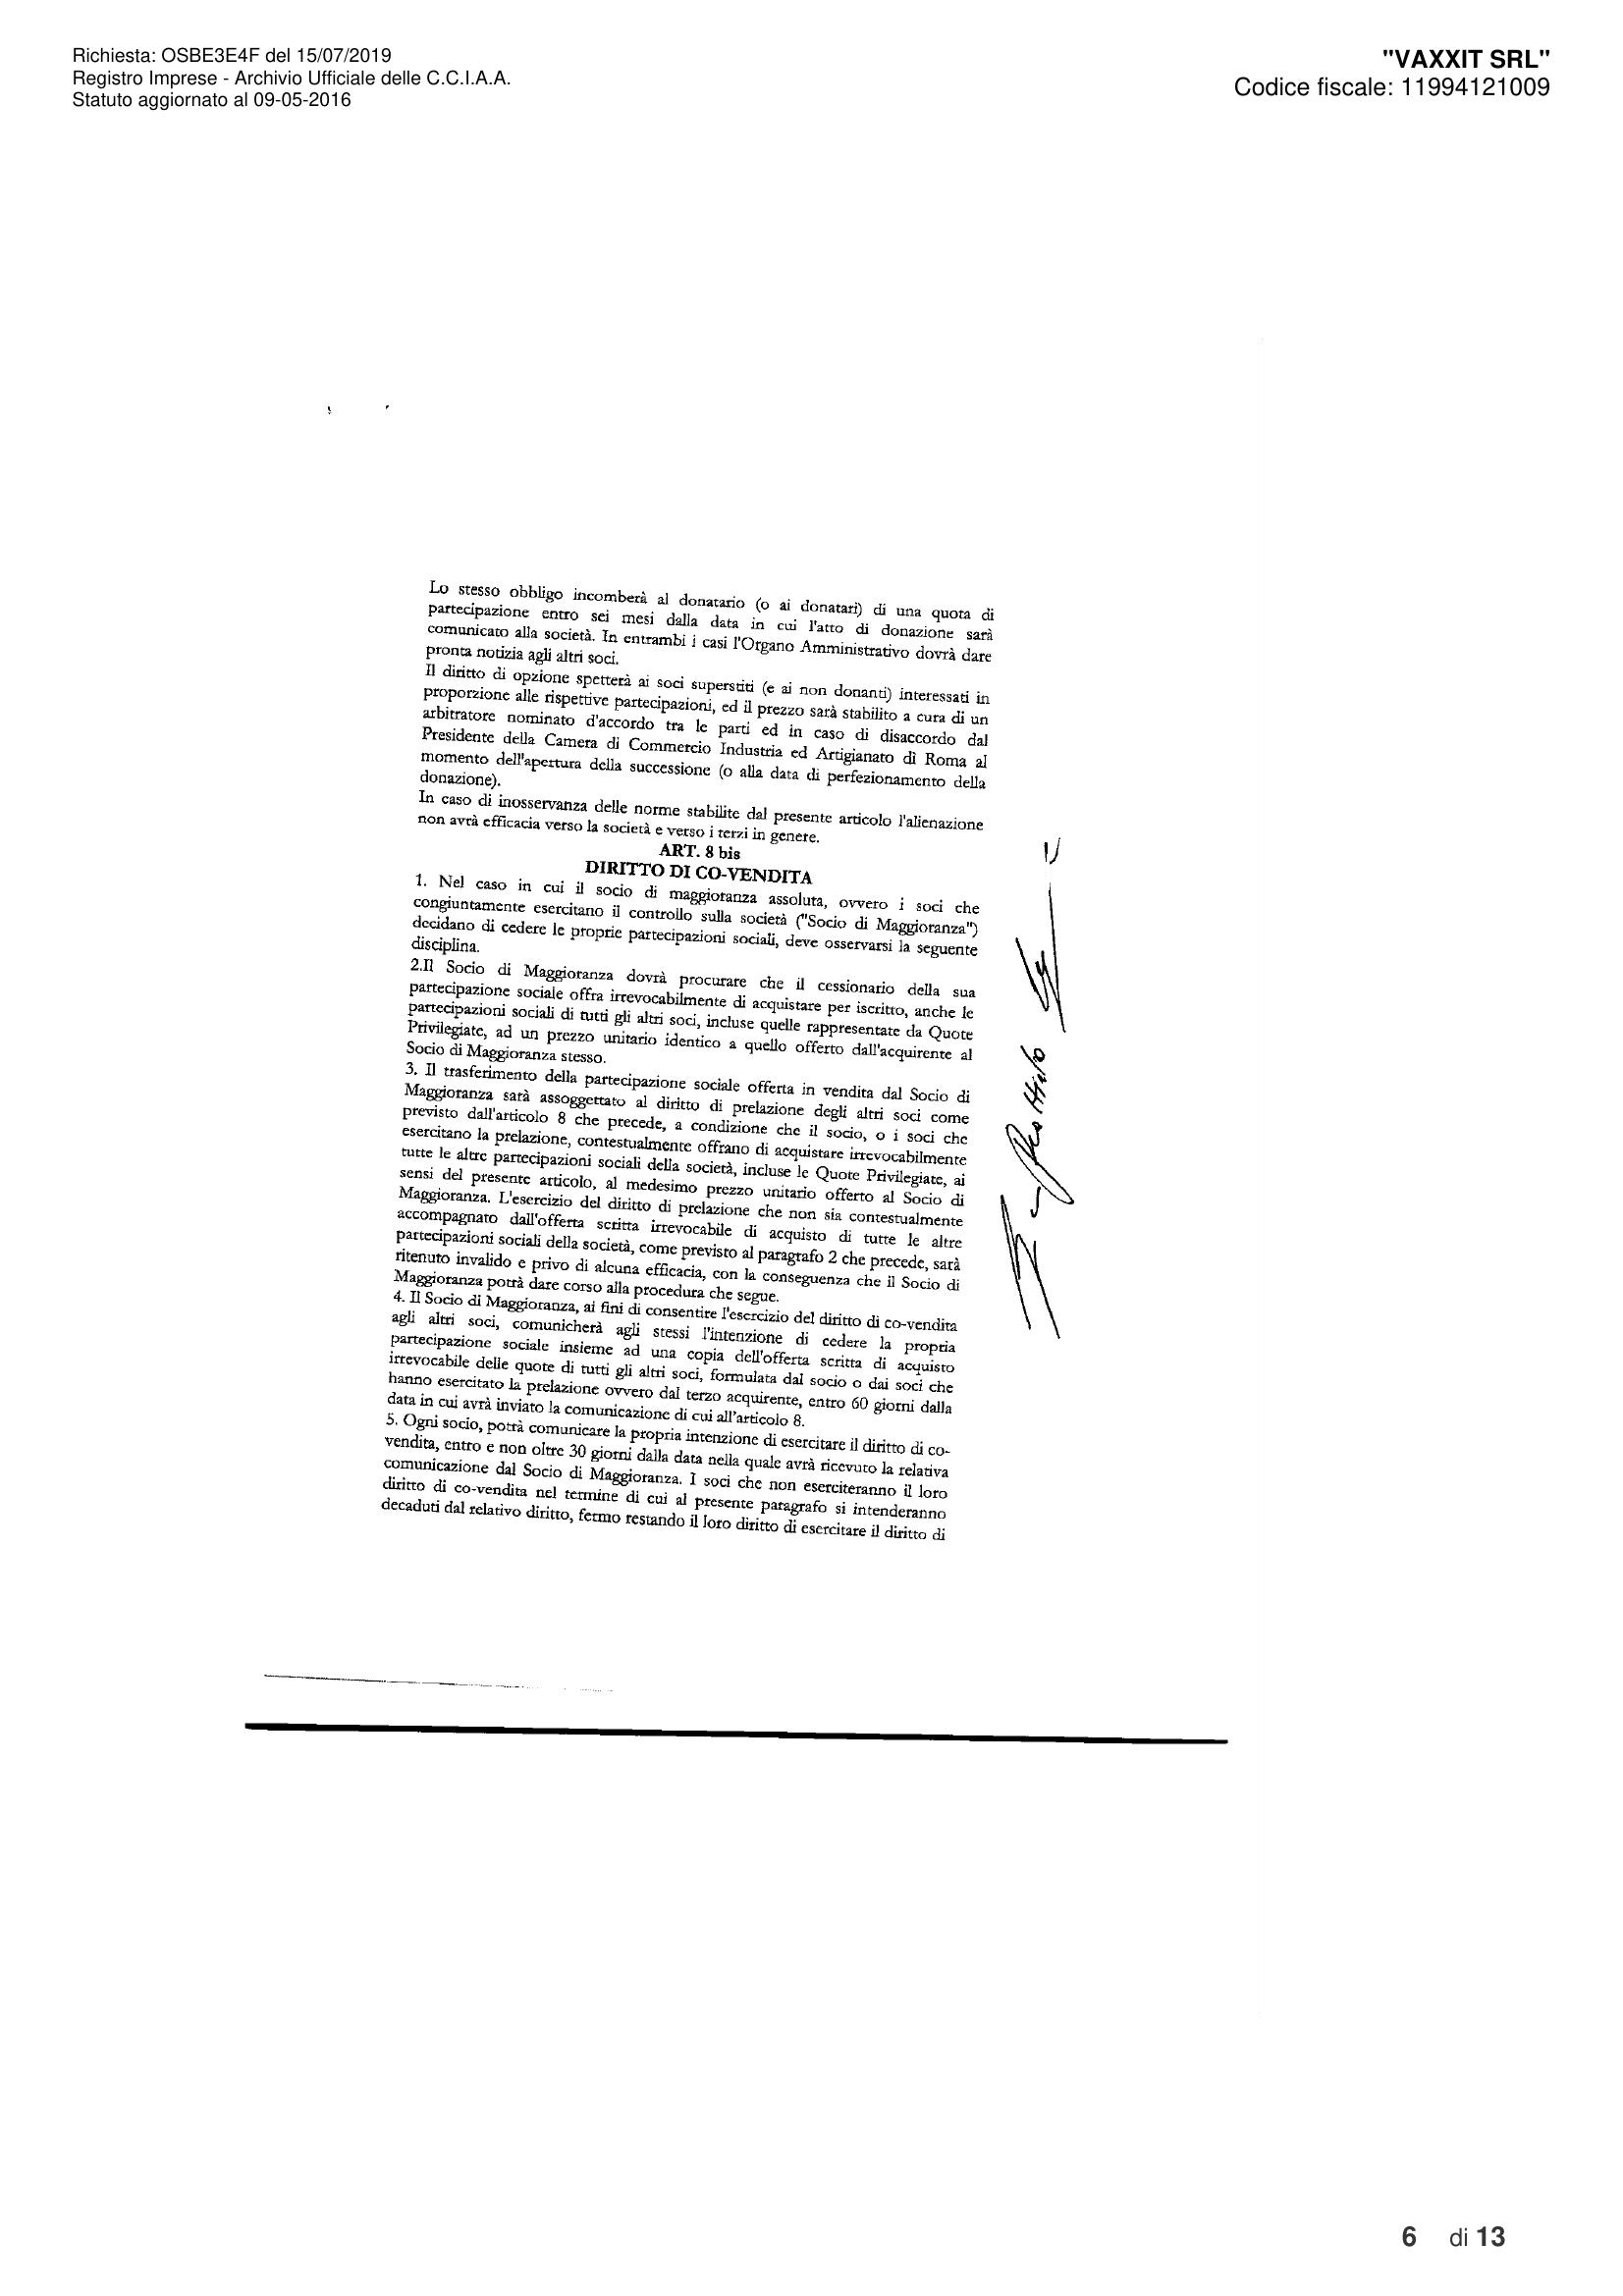

In [5]:
from ocr_legal.jpg_to_txt.jpg_cleaning import remove_from_img

clean_img = remove_from_img(img, v_mask)
show_cv2_img(clean_img)

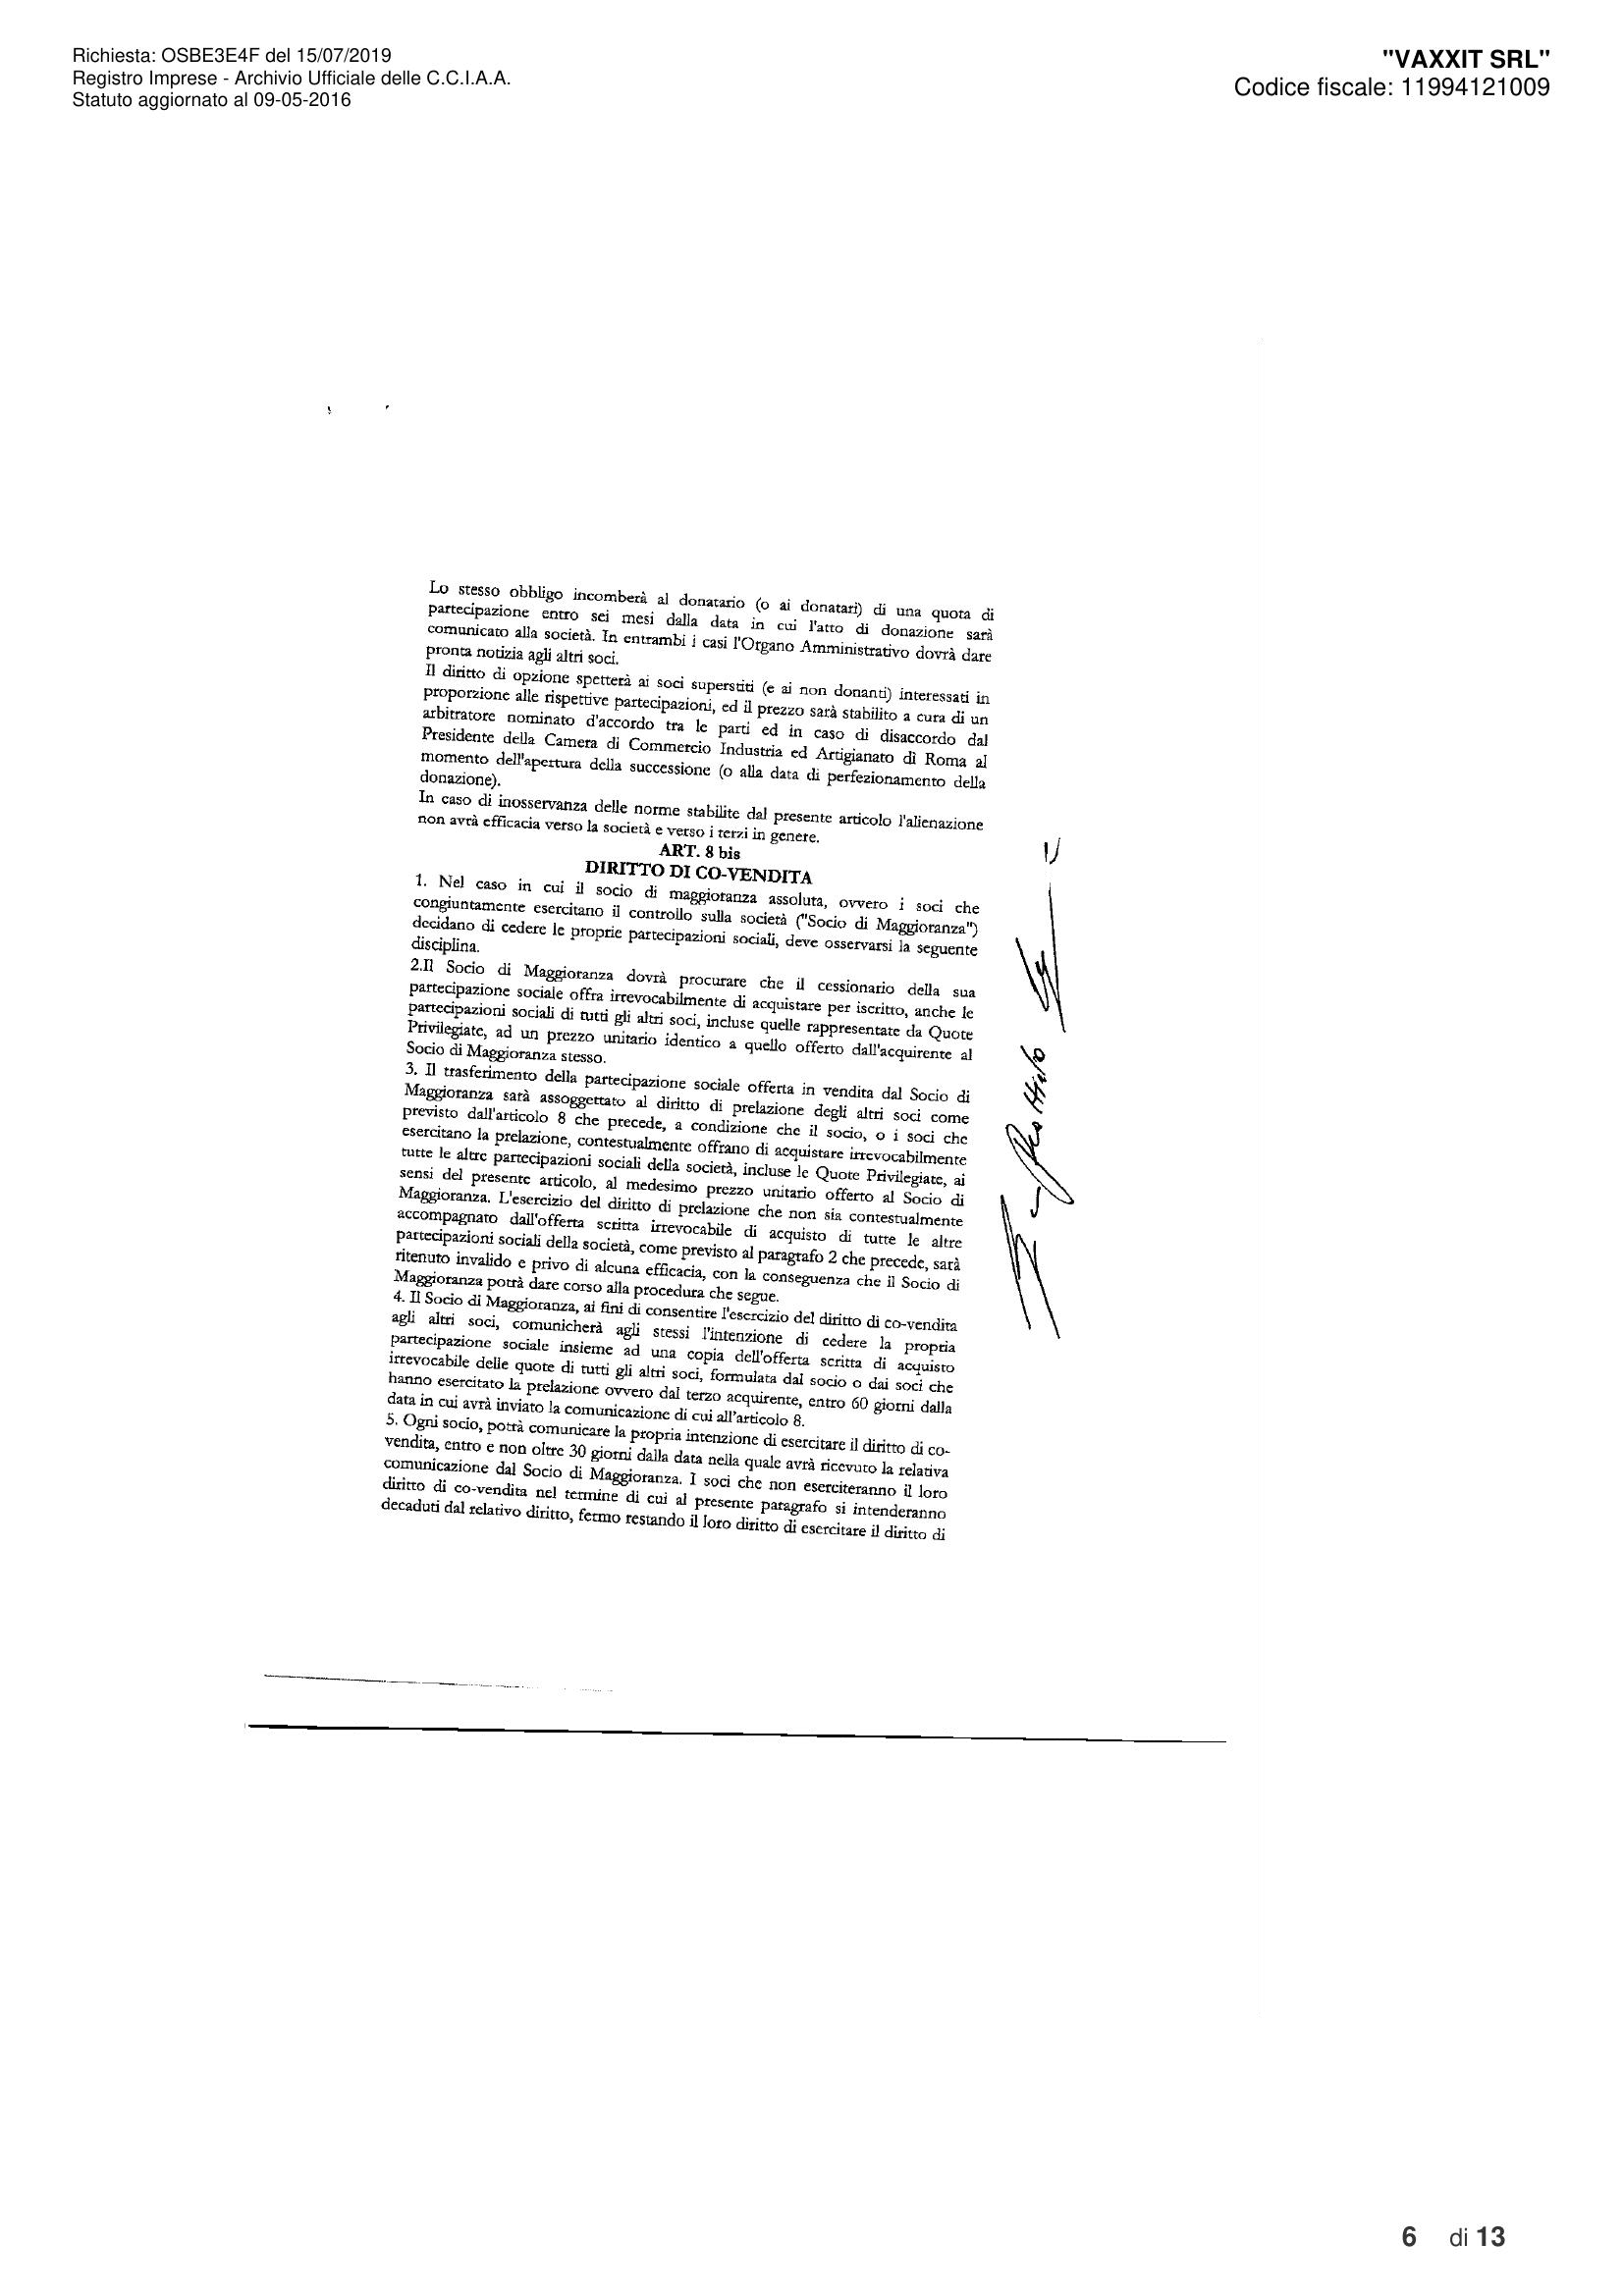

In [6]:
clean_img = remove_from_img(img, h_mask)
show_cv2_img(clean_img)

Finally we can select the rois:

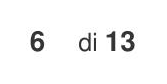

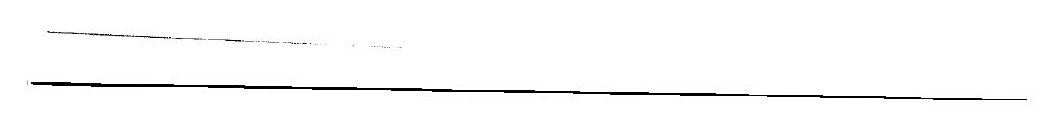

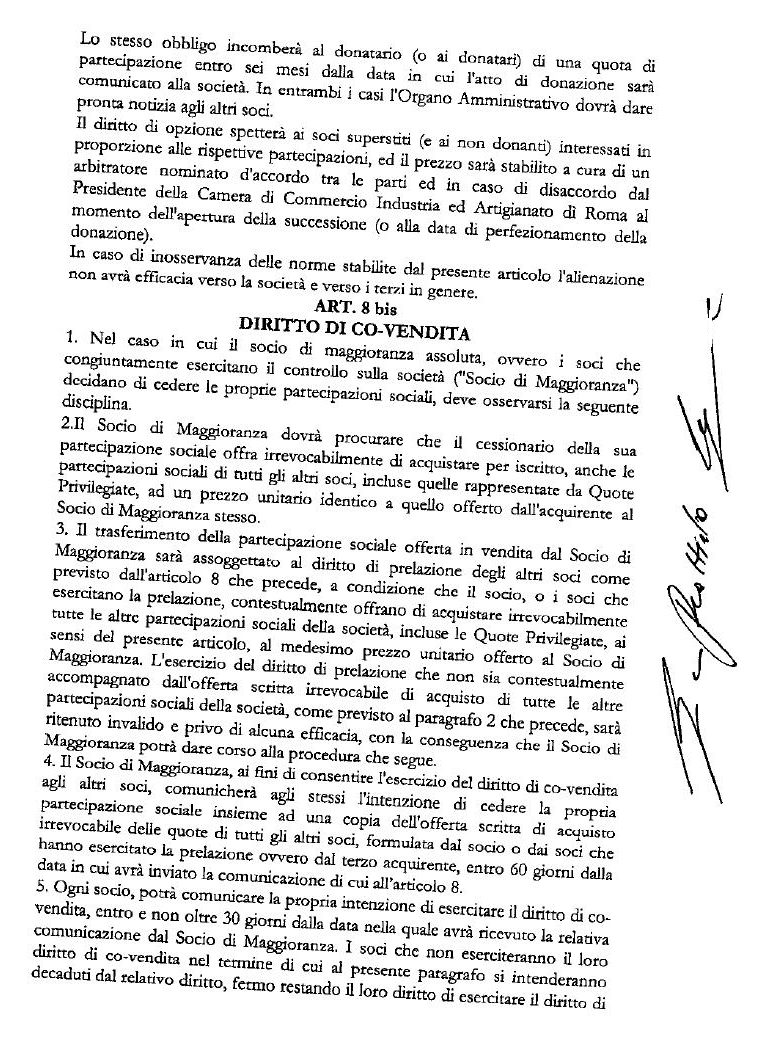

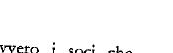

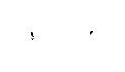

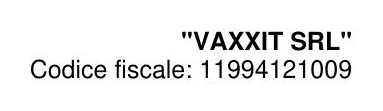

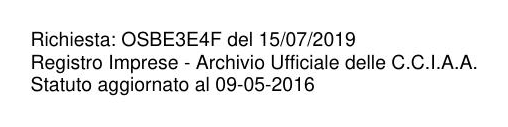

In [8]:
from ocr_legal.jpg_to_txt.jpg_to_roi import dilate_text_blocks, threshold, detect_text_blocks
from ocr_legal.utils.functions import show_multiple_cv2_imgs

rois = detect_text_blocks(*dilate_text_blocks(threshold(clean_img), clean_img))
show_multiple_cv2_imgs(rois)